In [1]:
import numpy as np
import xgboost as xgb

from constants import MODEL_PARAMS_FOLDER
from load_partitions import load_partitions_lbps
from template_test import get_param_grid, find_best_params, main_base
from results_processing import review_results, review_params, generate_results_table, \
    generate_table_from_df


In [2]:
review_results('xgb_results')
review_params('xgb_params')

left_240x20:	60.67 ± 2.13
left_240x20_fixed:	61.57 ± 1.88
left_240x40:	60.99 ± 1.70
left_240x40_fixed:	61.97 ± 2.13
right_240x20:	59.02 ± 1.88
right_240x20_fixed:	59.11 ± 1.60
right_240x40:	57.98 ± 1.54
right_240x40_fixed:	60.30 ± 1.72
left_240x20:	{'max_depth': 4, 'n_estimators': 80}
left_240x20_fixed:	{'max_depth': 5, 'n_estimators': 100}
left_240x40:	{'max_depth': 4, 'n_estimators': 80}
left_240x40_fixed:	{'max_depth': 2, 'n_estimators': 120}
right_240x20:	{'max_depth': 1, 'n_estimators': 100}
right_240x20_fixed:	{'max_depth': 2, 'n_estimators': 100}
right_240x40:	{'max_depth': 4, 'n_estimators': 20}
right_240x40_fixed:	{'max_depth': 5, 'n_estimators': 100}


In [8]:
review_results('xgb_results_cmim_1_orig')
print("""left_240x20:	{'max_depth': 6, 'n_estimators': 100}
left_240x20_fixed:	{'max_depth': 4, 'n_estimators': 90}
left_240x40:	{'max_depth': 1, 'n_estimators': 100}
left_240x40_fixed:	{'max_depth': 4, 'n_estimators': 60}
right_240x20:	{'max_depth': 1, 'n_estimators': 90}
right_240x20_fixed:	{'max_depth': 4, 'n_estimators': 110}
right_240x40:	{'max_depth': 4, 'n_estimators': 100}
right_240x40_fixed:	{'max_depth': 6, 'n_estimators': 80}""")

left_240x20:	60.03 ± 1.21
left_240x20_fixed:	60.23 ± 1.52
left_240x40:	59.52 ± 1.49
left_240x40_fixed:	60.18 ± 1.00
right_240x20:	58.72 ± 1.51
right_240x20_fixed:	61.78 ± 2.24
right_240x40:	59.58 ± 1.54
right_240x40_fixed:	61.01 ± 1.17
left_240x20:	{'max_depth': 6, 'n_estimators': 100}
left_240x20_fixed:	{'max_depth': 4, 'n_estimators': 90}
left_240x40:	{'max_depth': 1, 'n_estimators': 100}
left_240x40_fixed:	{'max_depth': 4, 'n_estimators': 60}
right_240x20:	{'max_depth': 1, 'n_estimators': 90}
right_240x20_fixed:	{'max_depth': 4, 'n_estimators': 110}
right_240x40:	{'max_depth': 4, 'n_estimators': 100}
right_240x40_fixed:	{'max_depth': 6, 'n_estimators': 80}


In [2]:
XGB_INIT_PARAMS = {'objective': 'binary:logistic',
                   'use_label_encoder': False,
                   'eval_metric': 'logloss',
                   'tree_method': 'gpu_hist',
                   # 'subsample': 0.7,
                   # 'sampling_method': 'gradient_based'
                  }

In [3]:
def get_xgb_param_grid(start_nestimators, step_nestimators, end_nestimators,
                       start_maxdepth, step_maxdepth, end_maxdepth):
    param_grid = get_param_grid(start_param_a=start_nestimators,
                                step_param_a=step_nestimators,
                                end_param_a=end_nestimators,
                                start_param_b=start_maxdepth,
                                step_param_b=step_maxdepth,
                                end_param_b=end_maxdepth,
                                param_a_name='n_estimators',
                                param_b_name='max_depth',
                                param_a_func='linspace',
                                param_b_func='linspace',
                                type_a=int,
                                type_b=int)
    return param_grid


def find_best_xgb_params(train_x: np.ndarray, train_y: np.ndarray,
                         dataset_name: str, partition: int, folder_name: str,
                         pair_method: str, n_jobs: int):
    params = find_best_params(train_x, train_y, dataset_name, partition,
                              folder_name, pair_method,
                              start_param_a=10, step_param_a=10,
                              end_param_a=50, start_param_b=2,
                              step_param_b=2,
                              end_param_b=6,
                              param_a_islog2=False, param_b_islog2=False,
                              param_a_min1=True, param_b_min1=True,
                              param_grid_fn=get_xgb_param_grid,
                              clasif_name='XGB', clasif_fn=xgb.XGBClassifier,
                              n_jobs=n_jobs, init_params=XGB_INIT_PARAMS)
    return params


def main(find_params=True, n_jobs=-1):
    main_base(find_params=find_params,
              out_params_name=MODEL_PARAMS_FOLDER + '/xgb_params',
              find_params_fn=find_best_xgb_params,
              out_results_name='xgb_results',
              clasif_fn=xgb.XGBClassifier,
              use_std_masks=False,
              n_cmim=0,
              n_jobs=n_jobs,
              init_params=XGB_INIT_PARAMS)


def main_cmim(n_cmim: int, find_params=True, n_jobs=-1):
    main_base(find_params=find_params,
              out_params_name=MODEL_PARAMS_FOLDER +
                              f'/xgb_params_cmim_{n_cmim}_lowtreesf1',
              find_params_fn=find_best_xgb_params,
              out_results_name=f'xgb_results_cmim_{n_cmim}_lowtreesf1',
              clasif_fn=xgb.XGBClassifier,
              use_std_masks=False,
              n_cmim=n_cmim,
              n_jobs=n_jobs,
              init_params=XGB_INIT_PARAMS)


def main_lbps(find_params=True, n_jobs=-1):
    from load_partitions import load_partitions_lbps
    main_base(find_params=find_params,
              out_params_name=MODEL_PARAMS_FOLDER + '/xgb_lbps_params_2',
              find_params_fn=find_best_xgb_params,
              out_results_name='xgb_lbps_results_2',
              clasif_fn=xgb.XGBClassifier,
              use_std_masks=False,
              n_cmim=0,
              n_jobs=n_jobs,
              dataset_loading_fn=load_partitions_lbps,
              init_params=XGB_INIT_PARAMS)


In [4]:
main_lbps(True, 5)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
XGB CV1 left_240x20_fixed execution time: 0:00:25.528386
Fitting 5 folds for each of 16 candidates, totalling 80 fits
XGB CV2 left_240x20_fixed execution time: 0:00:11.104711
Fitting 5 folds for each of 15 candidates, totalling 75 fits
XGB CV1 right_240x20_fixed execution time: 0:00:24.431059
Fitting 5 folds for each of 20 candidates, totalling 100 fits
XGB CV2 right_240x20_fixed execution time: 0:00:17.598974
Fitting 5 folds for each of 15 candidates, totalling 75 fits
XGB CV1 left_240x40_fixed execution time: 0:00:25.543879
Fitting 5 folds for each of 20 candidates, totalling 100 fits
XGB CV2 left_240x40_fixed execution time: 0:00:30.079213
Fitting 5 folds for each of 15 candidates, totalling 75 fits
XGB CV1 right_240x40_fixed execution time: 0:00:20.394438
Fitting 5 folds for each of 20 candidates, totalling 100 fits
XGB CV2 right_240x40_fixed execution time: 0:00:17.266196
Fitting 5 folds for each of 15 candidates, totall

In [5]:
review_results('xgb_lbps_results_2', True)
review_params('xgb_lbps_params_2', True)

Train left_240x20:	90.62 ± 0.87
left_240x20:	51.87 ± 2.05
Train left_240x20_fixed:	61.73 ± 1.15
left_240x20_fixed:	54.05 ± 1.46
Train left_240x40:	99.91 ± 0.08
left_240x40:	51.86 ± 1.49
Train left_240x40_fixed:	79.68 ± 0.57
left_240x40_fixed:	51.74 ± 1.96
Train right_240x20:	99.54 ± 0.39
right_240x20:	53.06 ± 2.13
Train right_240x20_fixed:	63.24 ± 1.48
right_240x20_fixed:	55.79 ± 1.44
Train right_240x40:	82.25 ± 0.93
right_240x40:	54.33 ± 1.38
Train right_240x40_fixed:	87.05 ± 1.12
right_240x40_fixed:	54.19 ± 2.18
cv1_left_240x20:	{'split0_test_score': array([0.52222222, 0.50555556, 0.49444444, 0.50555556, 0.49444444,
       0.52222222, 0.52777778, 0.51666667, 0.56666667, 0.52222222,
       0.55555556, 0.50555556, 0.51666667, 0.5       , 0.5       ]), 'split1_test_score': array([0.56424581, 0.58100559, 0.55865922, 0.59217877, 0.55307263,
       0.55865922, 0.55307263, 0.60893855, 0.55865922, 0.56424581,
       0.53072626, 0.51955307, 0.54189944, 0.54189944, 0.51955307]), 'split2_test_s

In [2]:
review_results('xgb_lbps_results_1', True)
review_params('xgb_lbps_params_1', True)

Train left_240x20:	74.16 ± 1.63
left_240x20:	52.63 ± 1.61
Train left_240x20_fixed:	60.23 ± 1.24
left_240x20_fixed:	53.95 ± 1.76
Train left_240x40:	72.39 ± 1.18
left_240x40:	52.54 ± 1.82
Train left_240x40_fixed:	55.84 ± 0.95
left_240x40_fixed:	52.46 ± 0.74
Train right_240x20:	61.58 ± 0.82
right_240x20:	55.44 ± 2.67
Train right_240x20_fixed:	72.58 ± 1.58
right_240x20_fixed:	54.83 ± 2.03
Train right_240x40:	62.40 ± 0.90
right_240x40:	54.36 ± 1.66
Train right_240x40_fixed:	84.27 ± 1.50
right_240x40_fixed:	53.99 ± 1.94
cv1_left_240x20:	{'split0_test_score': array([0.51111111, 0.5       , 0.53888889, 0.51111111, 0.52222222,
       0.48888889, 0.53888889, 0.51666667, 0.55      , 0.52222222,
       0.53888889, 0.57222222, 0.58888889, 0.55555556, 0.55555556]), 'split1_test_score': array([0.54189944, 0.51955307, 0.55307263, 0.54748603, 0.56424581,
       0.51955307, 0.55307263, 0.55307263, 0.54748603, 0.55865922,
       0.47486034, 0.54748603, 0.54189944, 0.53072626, 0.53072626]), 'split2_test_s

In [6]:
review_results('xgb_results_cmim_1_lowtrees', True)
review_params('xgb_params_cmim_1_lowtrees', False)

Train left_240x20:	94.22 ± 0.47
left_240x20:	58.86 ± 1.22
Train left_240x20_fixed:	100.00 ± 0.00
left_240x20_fixed:	60.02 ± 1.70
Train left_240x40:	100.00 ± 0.00
left_240x40:	59.46 ± 1.85
Train left_240x40_fixed:	100.00 ± 0.00
left_240x40_fixed:	61.07 ± 1.59
Train right_240x20:	72.38 ± 0.70
right_240x20:	58.87 ± 1.99
Train right_240x20_fixed:	100.00 ± 0.00
right_240x20_fixed:	60.76 ± 1.87
Train right_240x40:	84.63 ± 0.65
right_240x40:	59.06 ± 1.96
Train right_240x40_fixed:	90.65 ± 0.90
right_240x40_fixed:	60.03 ± 1.01
left_240x20:	{'max_depth': 4, 'n_estimators': 20}
left_240x20_fixed:	{'max_depth': 8, 'n_estimators': 30}
left_240x40:	{'max_depth': 6, 'n_estimators': 25}
left_240x40_fixed:	{'max_depth': 5, 'n_estimators': 60}
right_240x20:	{'max_depth': 1, 'n_estimators': 60}
right_240x20_fixed:	{'max_depth': 5, 'n_estimators': 60}
right_240x40:	{'max_depth': 2, 'n_estimators': 35}
right_240x40_fixed:	{'max_depth': 2, 'n_estimators': 60}


In [6]:
review_results('xgb_results_cmim_1_lowtreesf1', True)
review_params('xgb_params_cmim_1_lowtreesf1', True)

Train left_240x20:	94.22 ± 0.47
left_240x20:	58.86 ± 1.22
Train left_240x20_fixed:	100.00 ± 0.00
left_240x20_fixed:	59.45 ± 1.70
Train left_240x40:	100.00 ± 0.00
left_240x40:	59.98 ± 1.43
Train left_240x40_fixed:	100.00 ± 0.00
left_240x40_fixed:	60.95 ± 1.50
Train right_240x20:	57.79 ± 1.56
right_240x20:	54.29 ± 1.93
Train right_240x20_fixed:	100.00 ± 0.00
right_240x20_fixed:	60.76 ± 1.87
Train right_240x40:	84.63 ± 0.65
right_240x40:	59.06 ± 1.96
Train right_240x40_fixed:	100.00 ± 0.00
right_240x40_fixed:	61.11 ± 1.79
cv1_left_240x20:	{'mean_fit_time': array([0.34679375, 0.68930278, 0.76350131, 1.15940876, 1.15580521,
       0.46999912, 0.77799978, 1.13370442, 1.39819946, 1.92580791,
       0.99420571, 1.58539906, 2.0615067 , 2.64321051, 3.36292291]), 'std_fit_time': array([0.0751657 , 0.09342337, 0.0774338 , 0.10955415, 0.03054994,
       0.0556918 , 0.05032216, 0.04751257, 0.09023885, 0.10021795,
       0.09069591, 0.06830653, 0.07221824, 0.12641324, 0.39226047]), 'mean_score_time':

In [7]:
review_results('xgb_results_cmim_1', True)
review_params('xgb_params_cmim_1', True)

Train left_240x20:	100.00 ± 0.00
left_240x20:	60.03 ± 0.73
Train left_240x20_fixed:	78.34 ± 0.66
left_240x20_fixed:	59.87 ± 1.77
Train left_240x40:	100.00 ± 0.00
left_240x40:	60.15 ± 1.85
Train left_240x40_fixed:	99.99 ± 0.03
left_240x40_fixed:	60.90 ± 1.24
Train right_240x20:	100.00 ± 0.00
right_240x20:	58.59 ± 2.33
Train right_240x20_fixed:	99.99 ± 0.03
right_240x20_fixed:	61.16 ± 2.11
Train right_240x40:	77.17 ± 0.94
right_240x40:	58.06 ± 1.69
Train right_240x40_fixed:	100.00 ± 0.00
right_240x40_fixed:	61.84 ± 1.92
cv1_left_240x20:	{'mean_fit_time': array([0.44218984, 0.63039927, 0.83939939, 0.99980011, 0.68721137,
       0.96820235, 1.37660027, 1.64151134, 1.14730563, 1.59620724,
       2.03039994, 2.1474226 ]), 'std_fit_time': array([0.03745011, 0.06940756, 0.0410692 , 0.07382557, 0.05452167,
       0.04662962, 0.08766255, 0.08692932, 0.1145829 , 0.07602844,
       0.11315372, 0.10044843]), 'mean_score_time': array([0.01139984, 0.00579996, 0.01799998, 0.00920024, 0.01419935,
     

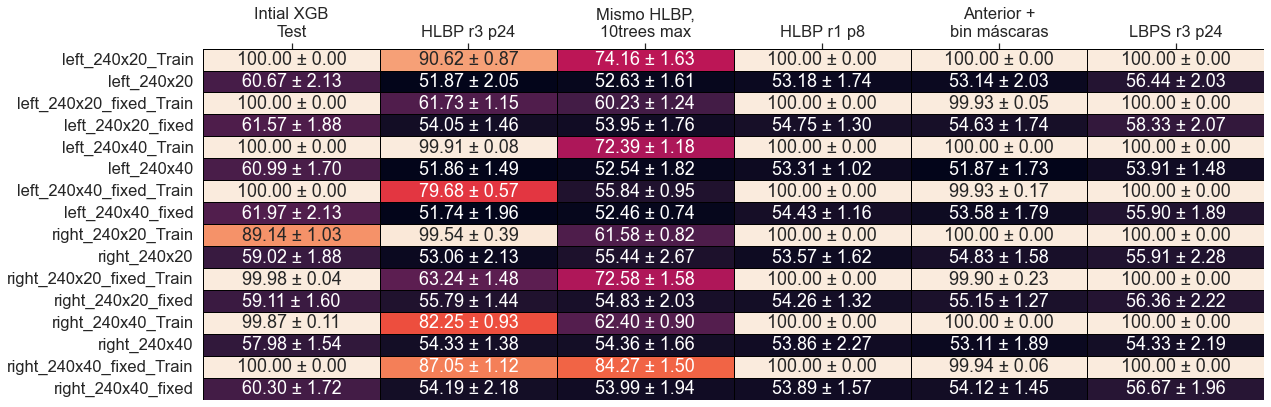

<Figure size 1296x432 with 0 Axes>

In [23]:
generate_results_table(
    folders=['xgb_results', 'xgb_hlbps_results_2', 'xgb_hlbps_results_1',
             'xgb_hlbps_r1_results_noparams', 'xgb_hlbps_r1_results_noparams_mask', 'xgb_lbps_r3_results_noparams'],
    keys=['Intial XGB Test', 'HLBP r3 p24', 'Mismo HLBP, 10trees max',
          'HLBP r1 p8', 'Anterior + bin máscaras', 'LBPS r3 p24'],
    out_folder='tables_xgb',
    out_name='table1_lbps.png',
    figsize=(18, 6),
    display=True,
    include_train=True
)

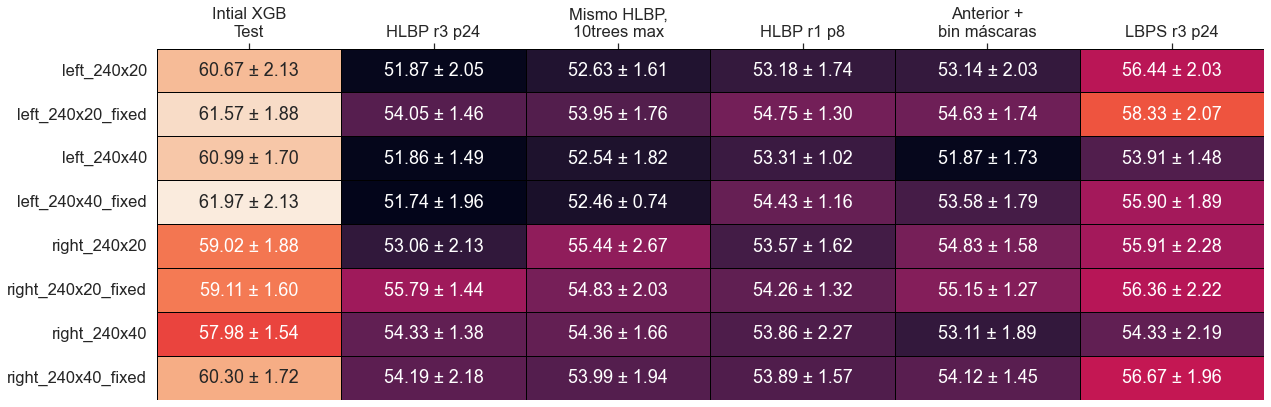

<Figure size 1296x432 with 0 Axes>

In [22]:
generate_results_table(
    folders=['xgb_results', 'xgb_hlbps_results_2', 'xgb_hlbps_results_1',
             'xgb_hlbps_r1_results_noparams', 'xgb_hlbps_r1_results_noparams_mask', 'xgb_lbps_r3_results_noparams'],
    keys=['Intial XGB Test', 'HLBP r3 p24', 'Mismo HLBP, 10trees max',
          'HLBP r1 p8', 'Anterior + bin máscaras', 'LBPS r3 p24'],
    out_folder='tables_xgb',
    out_name='table1_lbps_notrain.png',
    figsize=(18, 6),
    display=True,
    include_train=False
)

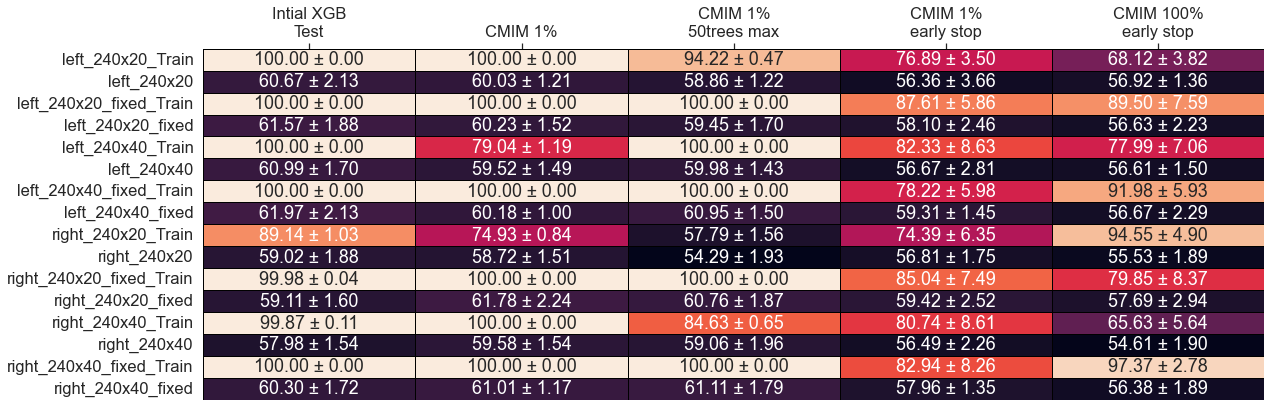

<Figure size 1296x432 with 0 Axes>

In [20]:
generate_results_table(
    folders=['xgb_results', 'xgb_results_cmim_1_orig', 'xgb_results_cmim_1_lowtreesf1',
             'xgb_results_cmim_1_early', 'xgb_results_cmim_100_earlynpnv'],
    keys=['Intial XGB Test', 'CMIM 1%', 'CMIM 1% 50trees max', 'CMIM 1% early stop',
          'CMIM 100% early stop'],
    out_folder='tables_xgb',
    out_name='table1.png',
    figsize=(18, 6),
    display=True,
    include_train=True
)

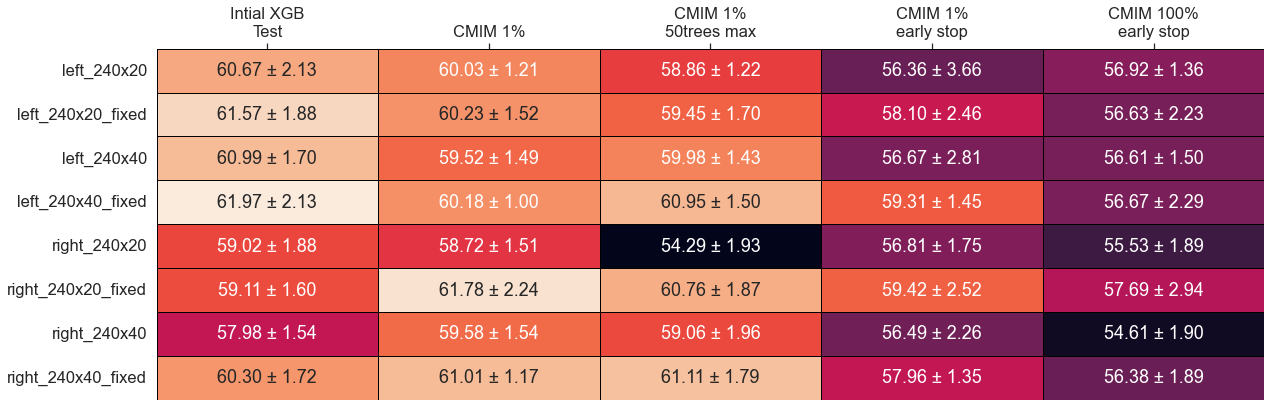

<Figure size 1296x432 with 0 Axes>

In [21]:
generate_results_table(
    folders=['xgb_results', 'xgb_results_cmim_1_orig', 'xgb_results_cmim_1_lowtreesf1',
             'xgb_results_cmim_1_early', 'xgb_results_cmim_100_earlynpnv'],
    keys=['Intial XGB Test', 'CMIM 1%', 'CMIM 1% 50trees max', 'CMIM 1% early stop',
          'CMIM 100% early stop'],
    out_folder='tables_xgb',
    out_name='table1_notrain.png',
    figsize=(18, 6),
    display=True,
    include_train=False
)